In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4.0
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4.0
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6.0
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15.0
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               953 non-null    int64  
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    object 
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      903 non-null    object 
 14  bpm                   953 non-null    object 
 15  key                   8

In [4]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

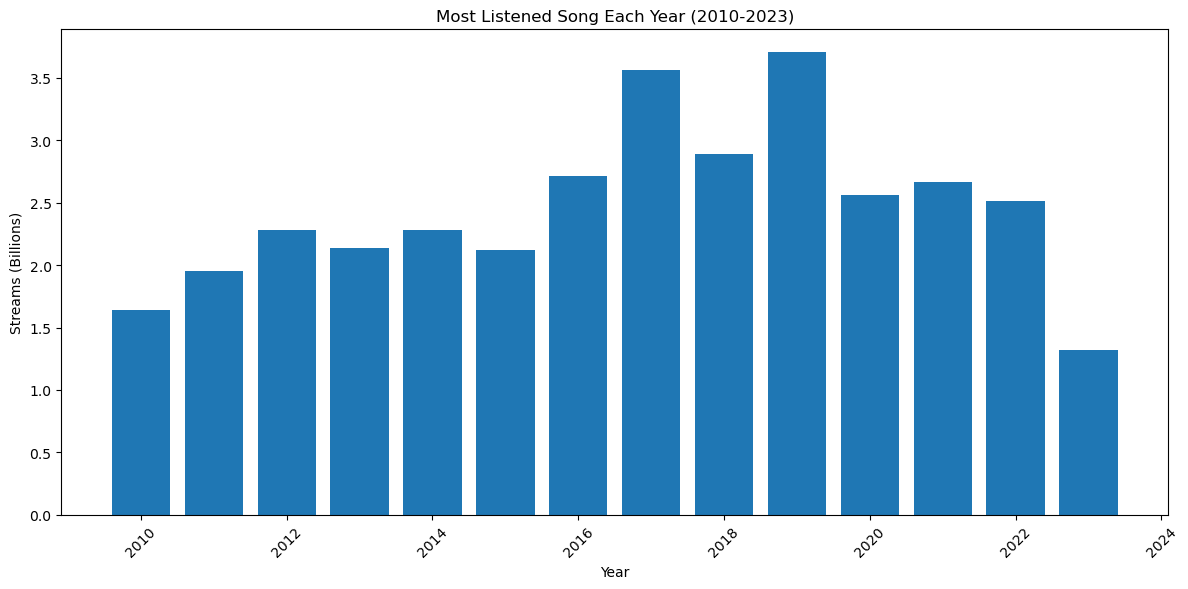

In [5]:
# Filter the DataFrame to include only songs released in 2010 onwards
df2 = df[df['released_year'] >= 2010]

# Group the data by 'released_year' and find the song with the most streams for each year
most_listened_songs = df2.groupby('released_year')['streams'].idxmax().apply(lambda x: df2.loc[x])

# Create a bar plot to visualize the most listened song each year
plt.figure(figsize=(12, 6))
plt.bar(most_listened_songs['released_year'], most_listened_songs['streams'] / 1e9)  # Convert to billions
plt.xlabel('Year')
plt.ylabel('Streams (Billions)')
plt.title('Most Listened Song Each Year (2010-2023)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
most_listened_songs

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
released_year,,,,,,,,,,,,,,,,,,,,,
2010,Just The Way You Are,Bruno Mars,1,2010,1,1,21106,13,1641426668,82,...,109,F,Major,63,46,85,1,0,9,5.0
2011,Can't Hold Us (feat. Ray Dalton),"Ray Dalton, Ryan Lewis, Macklemore",3,2011,8,16,6074,52,1953533826,201,...,146,D,Major,63,88,93,3,0,10,8.0
2012,Sweater Weather,The Neighbourhood,1,2012,5,14,16413,61,2282771485,166,...,124,A#,Major,61,41,81,5,2,10,3.0
2013,Take Me To Church,Hozier,1,2013,9,13,23804,31,2135158446,187,...,129,E,Minor,57,41,66,63,0,12,5.0
2014,Thinking Out Loud,Ed Sheeran,1,2014,1,1,33032,0,2280566092,363,...,79,D,Major,78,58,45,47,0,18,3.0
2015,Love Yourself,Justin Bieber,1,2015,11,9,22730,5,2123309722,289,...,100,E,Major,61,53,38,84,0,28,44.0
2016,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2713922350,433,...,104,C#,Major,77,36,63,1,0,36,5.0
2017,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,...,96,C#,Minor,83,93,65,58,0,9,8.0
2018,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,440,...,110,C#,Major,50,45,41,75,0,11,3.0


In [7]:
#show unique values in each column
for col in df.columns:
    print(col, df[col].nunique())

track_name 943
artist(s)_name 645
artist_count 8
released_year 50
released_month 12
released_day 31
in_spotify_playlists 879
in_spotify_charts 82
streams 949
in_apple_playlists 234
in_apple_charts 172
in_deezer_playlists 348
in_deezer_charts 34
in_shazam_charts 198
bpm 125
key 12
mode 3
danceability_% 72
valence_% 94
energy_% 81
acousticness_% 98
instrumentalness_% 39
liveness_% 68
speechiness_% 48


In [8]:
#drop key and mode columns
df = df.drop(['key', 'mode'], axis=1)
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [9]:
#combine 'released_year', 'released_month', 'released_day' columns into one column with a datetime data type
df['released'] = pd.to_datetime(df['released_year'].astype(str) + '-' + df['released_month'].astype(str) + '-' + df['released_day'].astype(str))
df = df.drop(['released_year', 'released_month', 'released_day'], axis=1)
df.head()

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,553,147,141381703,43,263,45,10,826,125,80,89,83,31,0,8,4.0,2023-07-14
1,LALA,Myke Towers,1,1474,48,133716286,48,126,58,14,382,92,71,61,74,7,0,10,4.0,2023-03-23
2,vampire,Olivia Rodrigo,1,1397,113,140003974,94,207,91,14,949,138,51,32,53,17,0,31,6.0,2023-06-30
3,Cruel Summer,Taylor Swift,1,7858,100,800840817,116,207,125,12,548,170,55,58,72,11,0,11,15.0,2019-08-23
4,WHERE SHE GOES,Bad Bunny,1,3133,50,303236322,84,133,87,15,425,144,65,23,80,14,63,11,6.0,2023-05-18


In [10]:
#graph of top 10 streamed songs
top10 = df.sort_values(by='streams', ascending=False).head(10)
top10

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released
55,Blinding Lights,The Weeknd,1,43899,69,3703895074,672,199,"3,421",20,NaN,171,50,38,80,0,0,9,7.0,2019-11-29
179,Shape of You,Ed Sheeran,1,32181,10,3562543890,33,0,"6,808",7,0,96,83,93,65,58,0,9,8.0,2017-01-06
86,Someone You Loved,Lewis Capaldi,1,17836,53,2887241814,440,125,"1,800",0,NaN,110,50,45,41,75,0,11,3.0,2018-11-08
620,Dance Monkey,Tones and I,1,24529,0,2864791672,533,167,"3,595",6,NaN,98,82,54,59,69,0,18,10.0,2019-05-10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,24094,78,2808096550,372,117,843,4,69,90,76,91,50,54,0,7,5.0,2018-10-09
162,One Dance,"Drake, WizKid, Kyla",3,43257,24,2713922350,433,107,"3,631",0,26,104,77,36,63,1,0,36,5.0,2016-04-04
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,17050,36,2665343922,492,99,798,31,0,170,59,48,76,4,0,10,5.0,2021-07-09
140,Believer,Imagine Dragons,1,18986,23,2594040133,250,121,"2,969",10,31,125,77,74,78,4,0,23,11.0,2017-01-31
725,Closer,"The Chainsmokers, Halsey",2,28032,0,2591224264,315,159,"2,179",0,44,95,75,64,52,41,0,11,3.0,2016-05-31
48,Starboy,"The Weeknd, Daft Punk",2,29536,79,2565529693,281,137,"2,445",1,140,186,68,49,59,16,0,13,28.0,2016-09-21


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            953 non-null    object        
 1   artist(s)_name        953 non-null    object        
 2   artist_count          953 non-null    int64         
 3   in_spotify_playlists  953 non-null    int64         
 4   in_spotify_charts     953 non-null    int64         
 5   streams               953 non-null    int64         
 6   in_apple_playlists    953 non-null    int64         
 7   in_apple_charts       953 non-null    int64         
 8   in_deezer_playlists   953 non-null    object        
 9   in_deezer_charts      953 non-null    int64         
 10  in_shazam_charts      903 non-null    object        
 11  bpm                   953 non-null    object        
 12  danceability_%        953 non-null    int64         
 13  valence_%           

In [12]:
#drop nan values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902 entries, 0 to 952
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            902 non-null    object        
 1   artist(s)_name        902 non-null    object        
 2   artist_count          902 non-null    int64         
 3   in_spotify_playlists  902 non-null    int64         
 4   in_spotify_charts     902 non-null    int64         
 5   streams               902 non-null    int64         
 6   in_apple_playlists    902 non-null    int64         
 7   in_apple_charts       902 non-null    int64         
 8   in_deezer_playlists   902 non-null    object        
 9   in_deezer_charts      902 non-null    int64         
 10  in_shazam_charts      902 non-null    object        
 11  bpm                   902 non-null    object        
 12  danceability_%        902 non-null    int64         
 13  valence_%           

In [13]:
df.describe()

,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,902.000000,902.000000,902.000000,9.020000e+02,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000
mean,1.566519,4800.009978,11.882483,4.692324e+08,60.536585,50.186253,2.525499,67.169623,51.319290,64.329268,26.772727,1.644124,18.194013,10.288248
std,0.888644,7614.429777,19.155985,5.198065e+08,75.092708,49.748855,5.751698,14.650688,23.514183,16.615225,25.869141,8.624666,13.725833,10.064777
min,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,845.500000,0.000000,1.367662e+08,12.000000,6.250000,0.000000,57.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2008.500000,3.000000,2.697280e+08,32.000000,35.000000,0.000000,69.000000,51.000000,66.000000,17.000000,0.000000,12.000000,6.000000
75%,2.000000,4892.250000,16.000000,5.988657e+08,80.000000,84.000000,2.000000,78.000000,70.000000,77.000000,42.000000,0.000000,23.000000,12.000000
max,8.000000,52898.000000,147.000000,3.562544e+09,532.000000,275.000000,58.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [14]:
df.describe

<bound method NDFrame.describe of                               track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     in_spotify_playlists  in

In [16]:
#print values from BPM column
df['bpm'].value_counts()


120    36
130    29
140    29
92     25
110    21
       ..
188     1
200     1
192     1
75      1
196     1
Name: bpm, Length: 123, dtype: int64

In [17]:
#convert values in BPM column to float
df['bpm'] = df['bpm'].astype(float)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902 entries, 0 to 952
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            902 non-null    object        
 1   artist(s)_name        902 non-null    object        
 2   artist_count          902 non-null    int64         
 3   in_spotify_playlists  902 non-null    int64         
 4   in_spotify_charts     902 non-null    int64         
 5   streams               902 non-null    int64         
 6   in_apple_playlists    902 non-null    int64         
 7   in_apple_charts       902 non-null    int64         
 8   in_deezer_playlists   902 non-null    object        
 9   in_deezer_charts      902 non-null    int64         
 10  in_shazam_charts      902 non-null    object        
 11  bpm                   902 non-null    float64       
 12  danceability_%        902 non-null    int64         
 13  valence_%           

In [20]:
#drop unnecessary columns for model
df_model = df.drop(['track_name', 'artist(s)_name', 'in_deezer_playlists', 'in_apple_playlists', "in_apple_charts", "in_shazam_charts", "released"], axis=1)
df_model.columns

Index(['artist_count', 'in_spotify_playlists', 'in_spotify_charts', 'streams',
       'in_deezer_charts', 'bpm', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [21]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902 entries, 0 to 952
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   artist_count          902 non-null    int64  
 1   in_spotify_playlists  902 non-null    int64  
 2   in_spotify_charts     902 non-null    int64  
 3   streams               902 non-null    int64  
 4   in_deezer_charts      902 non-null    int64  
 5   bpm                   902 non-null    float64
 6   danceability_%        902 non-null    int64  
 7   valence_%             902 non-null    int64  
 8   energy_%              902 non-null    int64  
 9   acousticness_%        902 non-null    int64  
 10  instrumentalness_%    902 non-null    int64  
 11  liveness_%            902 non-null    int64  
 12  speechiness_%         902 non-null    float64
dtypes: float64(2), int64(11)
memory usage: 98.7 KB


In [22]:
df_model = df_model.drop(['in_deezer_charts', "in_spotify_charts", "in_spotify_playlists"], axis=1)
df_model.columns

Index(['artist_count', 'streams', 'bpm', 'danceability_%', 'valence_%',
       'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%',
       'speechiness_%'],
      dtype='object')

In [23]:
#choose target and features
y = df_model['streams']
X = df_model.drop('streams', axis=1)

#split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)


In [24]:
#scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [26]:
#fit linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

#predict values
y_pred = model.predict(X_test_scaled)

#evaluate model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse


534680333.0495952

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from catboost import CatBoostRegressor
import lightgbm as lgb
from sklearn.linear_model import LinearRegression

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(),
    'ADA Boost' : AdaBoostRegressor(),
    'K Neighbors Regressor' : KNeighborsRegressor(),
    'Linear SVR' : LinearSVR(),
    'Cat Boost Regressor' : CatBoostRegressor(),
}

In [28]:
Name = ['Linear Regression','Decision Tree','Random Forest','SVR','XGBoost','LightGBM','Gradient Boosting Regressor' ,'ADA Boost' ,'K Neighbors Regressor','Linear SVR','Cat Boost Regressor']
accuracy = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Results for {name}:")
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared Score:", r2)
    accuracy.append(r2)
    print()

Results for Linear Regression:
Mean Squared Error (MSE): 2.8588305855002608e+17
Mean Absolute Error (MAE): 377866087.26058054
R-squared Score: 0.04644818338718104

Results for Decision Tree:
Mean Squared Error (MSE): 5.4662017965084563e+17
Mean Absolute Error (MAE): 490969265.9026549
R-squared Score: -0.8232303374216217

Results for Random Forest:
Mean Squared Error (MSE): 3.068253217015256e+17
Mean Absolute Error (MAE): 396747327.06557524
R-squared Score: -0.023403920383429977

Results for SVR:
Mean Squared Error (MSE): 3.4230761924660397e+17
Mean Absolute Error (MAE): 339855861.06448096
R-squared Score: -0.14175374304627053

Results for XGBoost:
Mean Squared Error (MSE): 3.427413590702466e+17
Mean Absolute Error (MAE): 401729741.8362832
R-squared Score: -0.143200465348982

Results for LightGBM:
Mean Squared Error (MSE): 3.368974034316144e+17
Mean Absolute Error (MAE): 407223822.5635488
R-squared Score: -0.12370817873470785

Results for Gradient Boosting Regressor:
Mean Squared Error 

In [29]:
accuracy

[0.04644818338718104,
 -0.8232303374216217,
 -0.023403920383429977,
 -0.14175374304627053,
 -0.143200465348982,
 -0.12370817873470785,
 -0.026935619901864216,
 -0.3414425018223315,
 -0.18179931945461414,
 -0.7022558952455884,
 -0.08279926201194776]

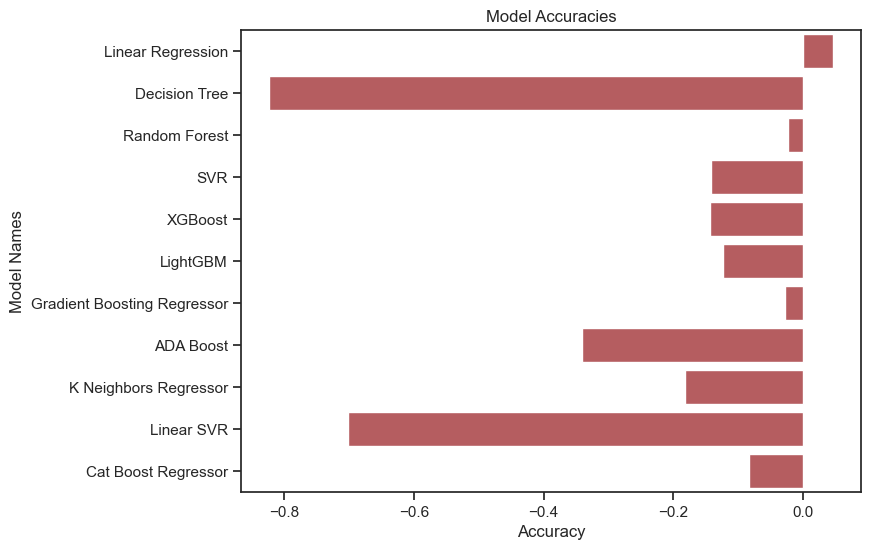

In [30]:
data = pd.DataFrame({"Names": Name, "Accuracies": accuracy})

sns.set(style="ticks")
plt.figure(figsize=(8, 6))

sns.barplot(x="Accuracies", y="Names", data=data, color="r")

plt.xlabel("Accuracy")
plt.ylabel("Model Names")
plt.title("Model Accuracies")

plt.show()

In [31]:
Name = ['Linear Regression','Decision Tree','Random Forest','SVR','XGBoost','LightGBM','Gradient Boosting Regressor' ,'ADA Boost' ,'K Neighbors Regressor','Linear SVR','Cat Boost Regressor']
accuracy = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Results for {name}:")
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared Score:", r2)
    accuracy.append(r2)
    print()

Results for Linear Regression:
Mean Squared Error (MSE): 2.8588305855002605e+17
Mean Absolute Error (MAE): 377866087.26058054
R-squared Score: 0.04644818338718115

Results for Decision Tree:
Mean Squared Error (MSE): 6.001255145114918e+17
Mean Absolute Error (MAE): 508686642.960177
R-squared Score: -1.0016952996814208

Results for Random Forest:
Mean Squared Error (MSE): 3.1149613861819974e+17
Mean Absolute Error (MAE): 396358473.8025664
R-squared Score: -0.03898324844347689

Results for SVR:
Mean Squared Error (MSE): 3.4230761888842797e+17
Mean Absolute Error (MAE): 339855860.16676724
R-squared Score: -0.14175374185158818

Results for XGBoost:
Mean Squared Error (MSE): 3.430830184751861e+17
Mean Absolute Error (MAE): 401573027.99557525
R-squared Score: -0.14434005699843233

Results for LightGBM:
Mean Squared Error (MSE): 3.368974034316144e+17
Mean Absolute Error (MAE): 407223822.5635488
R-squared Score: -0.12370817873470785

Results for Gradient Boosting Regressor:
Mean Squared Error 

In [32]:
accuracy

[0.04644818338718115,
 -1.0016952996814208,
 -0.03898324844347689,
 -0.14175374185158818,
 -0.14434005699843233,
 -0.12370817873470785,
 -0.035811440030929065,
 -0.2245439259995532,
 -0.10981509752836094,
 -0.7577827423810273,
 -0.08294803573908127]

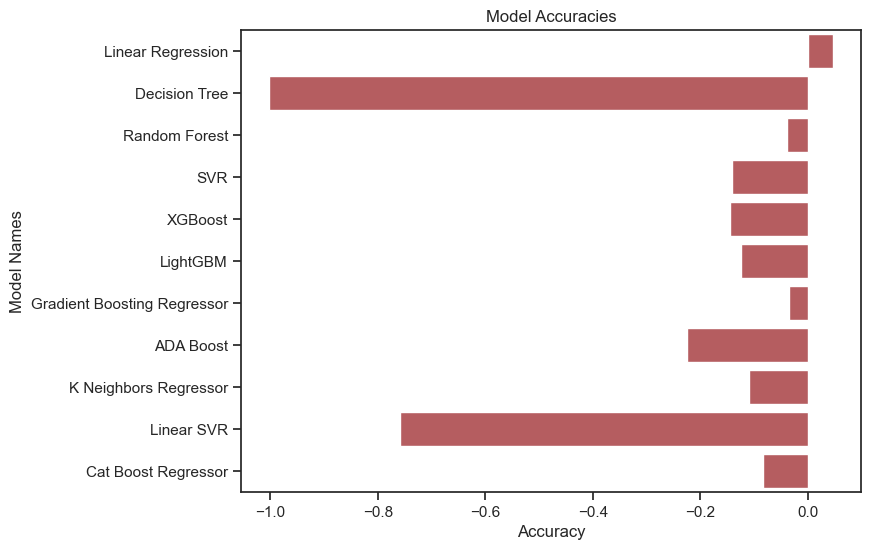

In [33]:
data = pd.DataFrame({"Names": Name, "Accuracies": accuracy})

sns.set(style="ticks")
plt.figure(figsize=(8, 6))

sns.barplot(x="Accuracies", y="Names", data=data, color="r")

plt.xlabel("Accuracy")
plt.ylabel("Model Names")
plt.title("Model Accuracies")

plt.show()

In [ ]:
#bad data for modelling or I've chosen the wrong features